In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [6]:
X_train.shape

(33600, 784)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.decomposition import PCA
#transforming to a 2-D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [10]:
X_train_trf

array([[ -0.57252566,  -2.37449509],
       [ -3.86020362,  -3.93186142],
       [  2.40688875,   4.21155568],
       ...,
       [ -7.52046526,  -1.99663799],
       [  0.78226777,   4.35250359],
       [  1.66409211, -11.30554757]])

In [11]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
            
fig.show()

In [12]:
#transforming in 3D
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [13]:
X_train_trf

array([[ -0.57250287,  -2.37325936,   1.50036673],
       [ -3.86024777,  -3.9314931 ,  -0.22895137],
       [  2.40688661,   4.21183238,  13.89253207],
       ...,
       [ -7.52045745,  -1.9967121 ,   3.4648907 ],
       [  0.78228565,   4.35171741,  -8.99400629],
       [  1.66408271, -11.30570188,  -4.2964217 ]])

In [14]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
                   color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()

In [15]:
pca.explained_variance_
#eigen values

array([40.57124964, 29.0865045 , 26.82830599])

In [16]:
pca.components_

array([[-5.38166037e-17,  1.58122994e-18,  2.56308088e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-5.05719884e-17,  3.87263441e-17,  3.23227593e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.23060670e-17, -3.79471019e-17,  2.01493559e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [17]:
pca.components_.shape

(3, 784)

In [18]:
pca.explained_variance_ratio_

array([0.05770988, 0.0413736 , 0.03816146])

In [20]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [21]:
pca.explained_variance_.shape

(784,)

In [22]:
pca.components_.shape

(784, 784)

In [23]:
pca.explained_variance_ratio_

array([5.77098751e-02, 4.13735973e-02, 3.81614618e-02, 2.94807385e-02,
       2.55685524e-02, 2.24815935e-02, 1.96579843e-02, 1.77928005e-02,
       1.56757068e-02, 1.44157739e-02, 1.37729668e-02, 1.22626127e-02,
       1.14581925e-02, 1.12558686e-02, 1.06789742e-02, 1.01539001e-02,
       9.57729838e-03, 9.40313104e-03, 9.18678990e-03, 8.97210219e-03,
       8.36245933e-03, 8.20594649e-03, 7.87192104e-03, 7.62773332e-03,
       7.36309042e-03, 7.03770839e-03, 6.97562163e-03, 6.66782927e-03,
       6.36448682e-03, 6.27332516e-03, 6.14201068e-03, 6.02290259e-03,
       5.85103048e-03, 5.80888896e-03, 5.73704929e-03, 5.54293586e-03,
       5.42204375e-03, 5.27899242e-03, 5.11484750e-03, 4.91401106e-03,
       4.89322064e-03, 4.82955289e-03, 4.67547781e-03, 4.61659179e-03,
       4.56034879e-03, 4.50385410e-03, 4.47340620e-03, 4.44924326e-03,
       4.38821184e-03, 4.26900715e-03, 4.19976449e-03, 4.16515948e-03,
       4.04546154e-03, 4.01778639e-03, 3.97012452e-03, 3.84669432e-03,
      

In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05770988, 0.09908347, 0.13724493, 0.16672567, 0.19229423,
       0.21477582, 0.2344338 , 0.2522266 , 0.26790231, 0.28231808,
       0.29609105, 0.30835366, 0.31981186, 0.33106772, 0.3417467 ,
       0.3519006 , 0.3614779 , 0.37088103, 0.38006782, 0.38903992,
       0.39740238, 0.40560833, 0.41348025, 0.42110798, 0.42847107,
       0.43550878, 0.4424844 , 0.44915223, 0.45551672, 0.46179004,
       0.46793205, 0.47395496, 0.47980599, 0.48561488, 0.49135192,
       0.49689486, 0.5023169 , 0.5075959 , 0.51271074, 0.51762475,
       0.52251798, 0.52734753, 0.53202301, 0.5366396 , 0.54119995,
       0.5457038 , 0.55017721, 0.55462645, 0.55901466, 0.56328367,
       0.56748343, 0.57164859, 0.57569405, 0.57971184, 0.58368197,
       0.58752866, 0.59129587, 0.59501428, 0.59872092, 0.60237187,
       0.60595862, 0.60951804, 0.6130001 , 0.6164631 , 0.61990156,
       0.6233131 , 0.62669612, 0.63002719, 0.63326318, 0.63649093,
       0.63967343, 0.64282959, 0.64590491, 0.64895796, 0.65199

In [26]:
import matplotlib.pyplot as plt

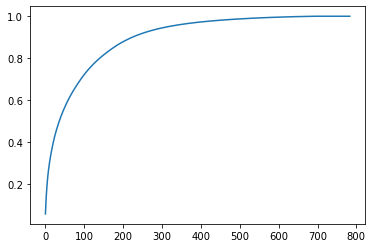

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))